# ARMA processes

$(X_t)_{t\in \Z}$ is an ARMA($p, q$) process if it satisfies

$$ X_t - \phi_1 X_{t-1} - \cdots - \phi_p X_{t-p} = \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}, \qquad \epsilon_t \sim \mathrm{WN}(0, \sigma^2)$$

Under certain conditions on the AR coefficients $\phi_1, \ldots, \phi_p$, there exists a solution $X_t$ which is stationary and can be written as an (infinite) linear combination of $\epsilon_{t-j}$ with $j\ge 0$ (causal). We will mostly restrict attention to stationary and causal processes.

As an example, we plot the parameter restrictions on $\phi_1, \phi_2$ for which any ARMA(2, $q$) model has a stationary causal solution:

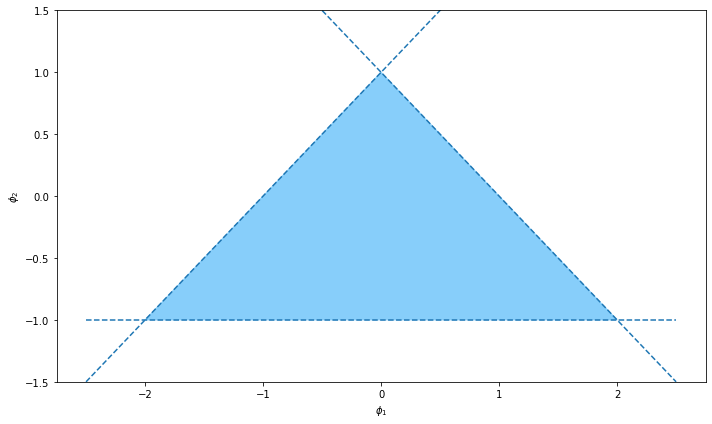

In [30]:
import math as mth
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

phi1 = np.linspace(-2.5, 2.5, 51)

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(phi1, 1 - phi1, color = "tab:blue", linestyle = "--")
ax.plot(phi1, 1 + phi1, color = "tab:blue", linestyle = "--")
ax.hlines(-1, -2.5, 2.5, color = "tab:blue", linestyle = "--")
ax.fill([-2, 0, 2], [-1, 1, -1], color = "lightskyblue")
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel(r"$\phi_1$")
ax.set_ylabel(r"$\phi_2$")
fig.tight_layout()
plt.show()


ARMA($p, q$) models of this type provide a rich class of models for stationary (univariate) time series. They are not suitable to model every stationary time series, but do include time series with a rich variety of, for example, autocovariance functions.

Some examples of the ACF and PACF of ARMA($p, q$) processes are given below.

In [2]:
def plot_acf_pacf(arma, nlags = 20, figsize = (12, 6)):

    fig, axes = plt.subplots(2, 1, figsize = figsize)
    x = range(nlags)
    acf = arma.acf(nlags)
    pacf = arma.pacf(nlags)
    titles = ["ACF", "PACF"]
    for (i, cf) in enumerate([acf, pacf]):
        axes[i].scatter(x, cf)
        axes[i].vlines(x, 0, cf, color = "tab:blue")
        axes[i].hlines(0, 0, nlags, color = "lightskyblue", alpha  =0.5)
        axes[i].set_xlim(-0.5, nlags + 0.5)
        axes[i].set_title(titles[i])
        axes[i].set_xticks([i * 4 for i in range(mth.floor(nlags/4) + 1)])
    
    fig.tight_layout()
    plt.show()

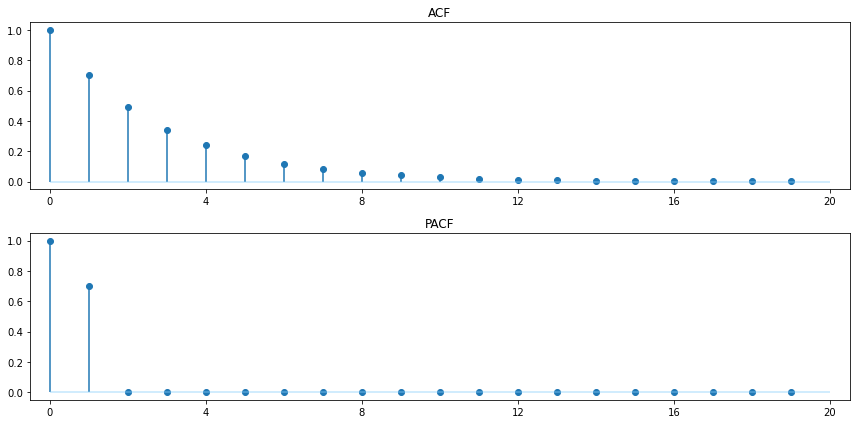

In [3]:
# AR(1), \phi = [0.7]

ar1 = sm.tsa.ArmaProcess(ar = [1.0, -0.7], ma = [1.0])
plot_acf_pacf(ar1)

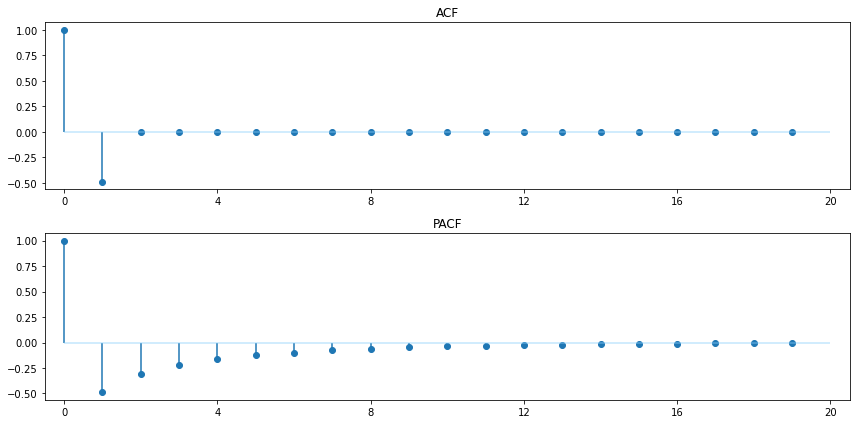

In [4]:
# MA(1), theta = [-0.8]
ma1 = sm.tsa.ArmaProcess(ar = [1.0], ma = [1.0, -0.8])
plot_acf_pacf(ma1)

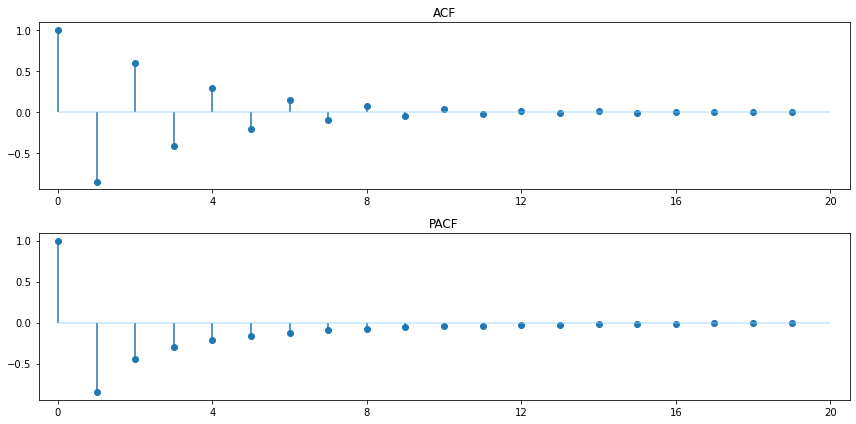

In [6]:
# ARMA(1, 1), \phi = [0.7], \theta = [-0.8]

arma11 = sm.tsa.ArmaProcess(ar = [1.0, 0.7], ma = [1.0, -0.8])
plot_acf_pacf(arma11, 20)

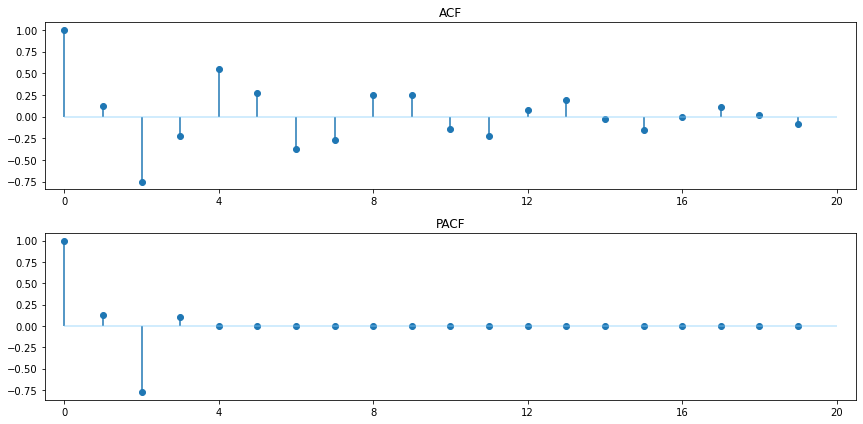

In [10]:
# AR(3), \phi = [0.3, -0.8, 0.1]

ar3 = sm.tsa.ArmaProcess(ar = [1.0, -0.3, 0.8, -0.1], ma = [1.0])
plot_acf_pacf(ar3, 20)

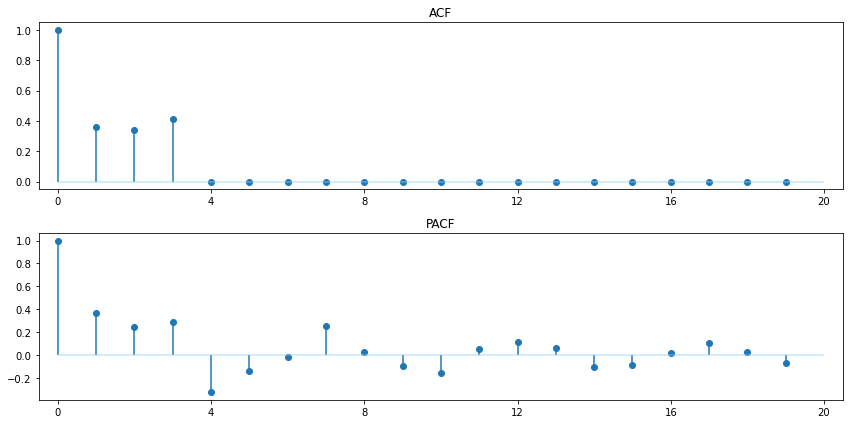

In [11]:
# MA(3), \theta = [0.2, 0.5, 0.8]

ma3 = sm.tsa.ArmaProcess(ar = [1.0], ma = [1.0, 0.2, 0.5, 0.8])
plot_acf_pacf(ma3, 20)


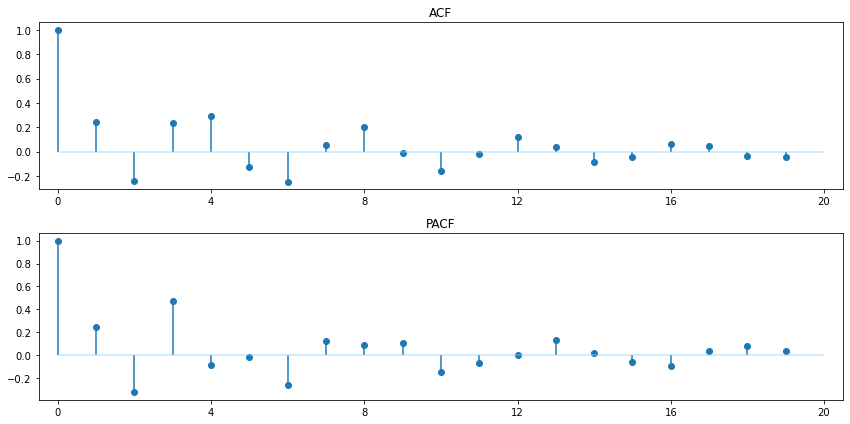

In [41]:
# ARMA(3, 3), phi = [0.3, -0.8, 0.1], \theta = [0.2, 0.5, 0.8]

arma33 = sm.tsa.ArmaProcess(ar = [1.0, -0.3, 0.8, -0.1], ma = [1.0, 0.2, 0.5, 0.8])
plot_acf_pacf(arma33)

Once we have an ARMA($p, q$) model it is also easy to forecast future values of the time series. 

Below we draw a realisation from the previous ARMA($3, 3$) model and forecast the next value based on based on the estimated autocovariances.

In [478]:
np.random.seed(4532344)
burn_in = 400
n = 400

X = arma33.generate_sample(burn_in + n)
X = X[burn_in:burn_in+n]

m = 21
acvf = sm.tsa.acovf(X, nlag = m)
theta, sigma2 = sm.tsa.stattools.innovations_algo(acvf, n)
u = sm.tsa.stattools.innovations_filter(X, theta)
X_fcst_est = np.dot(theta[n-1, :], u[::-1][0:m])

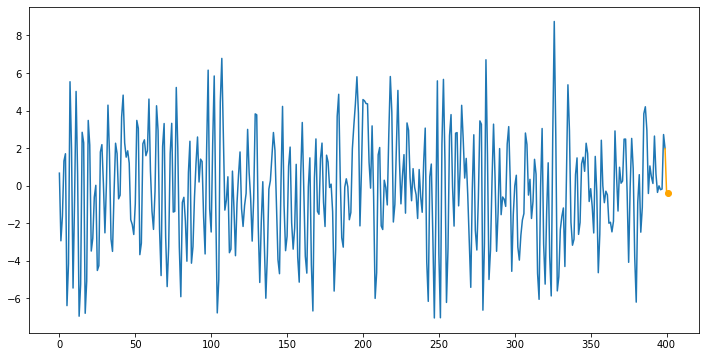

In [479]:
fig, ax = plt.subplots(figsize= (12, 6))
ax.plot(range(n), X)
ax.scatter(np.array([n+1]), np.array([X_fcst_est]), color = "orange")
ax.plot(range(n+1), np.concatenate((np.repeat(np.nan, n-1), np.array([X[n-1], X_fcst_est]))), color = "orange")
plt.show()